In [1]:
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc

import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [7]:
# https://medium.com/@enriqueav/how-to-create-video-animations-using-python-and-opencv-881b18e41397

In [2]:
width = 1280
height = 720
FPS = 24
seconds = 10

To save a video file, OpenCV needs two things: a codec VideoWriter_fourcc and a writer object VideoWriter . FourCC is a 4-byte code used to specify the video codec

Note the video writer takes four parameters:
Path of the video (usually .avi, .mov or .mp4, depending on the codec).
FourCC codec
Frames per seconds
Size: a tuple (width, height).

In [3]:
fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./noise.avi', fourcc, float(FPS), (width, height))

The we create a loop to write to the video frame by frame. In OpenCV we can represent an image (a frame, in this case) with a three-dimensional numpy array of uint8 type. The dimensions of the array are height , width (note the order is reversed) and the number 3 , one fore each channel (reed, green and blue). Using np.random.randint we initialize each position with a value between 0 and 225. Finally we add each frame to the video using video.write :

In [4]:
for _ in range(FPS*seconds):
    frame = np.random.randint(0, 256, 
                              (height, width, 3), 
                              dtype=np.uint8)
    video.write(frame)

In [5]:
video.release()

In [6]:
width = 1280
height = 720
FPS = 24
seconds = 10
radius = 150
paint_h = int(height/2)

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./circle_noise.avi', fourcc, float(FPS), (width, height))

for paint_x in range(-radius, width+radius, 6):
    frame = np.random.randint(0, 256, 
                              (height, width, 3), 
                              dtype=np.uint8)
    cv2.circle(frame, (paint_x, paint_h), radius, (0, 0, 0), -1)
    video.write(frame)

video.release()

# Movie of FLIR Data

In [7]:
#fname = 'WD_140mm'
#fname = 'WD_310mm'
#fname = 'WD_400mm'
#fname = 'WD_500mm'
fname = 'WD_632mm'

infile = fname + '.pk'
outfile = './' + fname + '.avi'
f = open(infile,'rb') 

mylist = pickle.load(f)
f.close()

timeStart = mylist.pop(0)
timeStop = mylist.pop(-1)

print('List length: ', len(mylist), '\tImage dim: ', mylist[0].shape)

print('Max: ', np.amax(mylist[0]), '\tMin: ', np.amin(mylist[0]))

FileNotFoundError: [Errno 2] No such file or directory: 'WD_632mm.pk'

In [8]:
list_len = len(mylist)

im_max = []
im_min = []

for i in range(list_len):
    im_max.append(np.amax(mylist[i]))
    im_min.append(np.amin(mylist[i]))
    
print(len(im_max))
#fig = plt.figure()
#ax = plt.axes()
x = np.linspace(0, list_len)
plt.title("Max and Min image values")
plt.plot(im_max, color = 'red', label = 'Max')
plt.plot(im_min, color = 'blue', label = 'Min')
plt.legend()

NameError: name 'mylist' is not defined

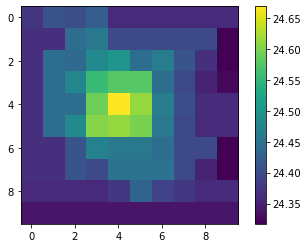

In [148]:
item = 300

plt.imshow(mylist[item], cmap='viridis')
plt.colorbar()
plt.show()

In [149]:
frame = mylist[item]

frame = frame - np.amin(frame)
print(np.amin(frame), np.amax(frame))

frame = 255*frame/np.amax(frame)
print(np.amin(frame), np.amax(frame))

frame = frame.astype(dtype=np.uint8)
print(np.amin(frame), np.amax(frame))

0.0 0.3509540557861328
0.0 255.0
0 255


## Set up video parameters

In [150]:
imLength = len(mylist)

width = mylist[0].shape[1]
height = mylist[0].shape[0]

FPS = 24

# https://www.pyimagesearch.com/2016/02/22/writing-to-video-with-opencv/
fourcc = VideoWriter_fourcc(*'MP42')  # MPeG-4
#fourcc = VideoWriter_fourcc(*'MJPG')  #Motion JPEG
#video = VideoWriter('./flir.avi', fourcc, float(FPS), (width, height))

## Linear contrast stretch

In [151]:
video = VideoWriter(outfile, fourcc, float(FPS), (width, height))  # './flir_linear.avi'

for i in range(imLength):
    frame = mylist[i]
    
    frame = frame - np.amin(frame)
    frame = 255*frame/np.amax(frame)
    frame = frame.astype(dtype=np.uint8)
    rgb = cv2.cvtColor(frame,cv2.COLOR_GRAY2RGB)
    # https://docs.opencv.org/3.4.12/d3/d50/group__imgproc__colormap.html
    imC = cv2.applyColorMap(rgb, cv2.COLORMAP_PLASMA)

    #frame = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
    video.write(imC)
    
video.release()

C:\Users\KEVINK~1\AppData\Local\Temp/ipykernel_19920/1427528288.py:7: RuntimeWarning: invalid value encountered in true_divide
  frame = 255*frame/np.amax(frame)


## Hist EQ

In [73]:
video = VideoWriter('./flir_histEQ.avi', fourcc, float(FPS), (width, height))

for i in range(imLength):
    frame = mylist[i].astype(dtype=np.uint8)
    rgb = cv2.cvtColor(frame,cv2.COLOR_GRAY2RGB)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    equalized = cv2.equalizeHist(gray)
    rgb2 = cv2.cvtColor(equalized,cv2.COLOR_GRAY2RGB)

    video.write(rgb2)
    
video.release()

## Adaptive EQ

In [74]:
video = VideoWriter('./flir_adaptEQ.avi', fourcc, float(FPS), (width, height))

for i in range(imLength):
    frame = mylist[i].astype(dtype=np.uint8)
    rgb = cv2.cvtColor(frame,cv2.COLOR_GRAY2RGB)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit = 1.0, tileGridSize=(8, 8))
    equalized = clahe.apply(gray)
    rgb2 = cv2.cvtColor(equalized,cv2.COLOR_GRAY2RGB)

    video.write(rgb2)
    
video.release()